# U-Net论文复现

UNet 于 2015 年在医学图像分割领域首次提出，凭借其在生物医学图像分割挑战中的优异表现（如 ISBI 挑战赛中的出色成绩）获得广泛关注。其核心思想是通过对称的编码器-解码器结构与跳跃连接（skip connections）相结合，既提取深层语义特征，又保留高分辨率的空间信息，从而实现精确的像素级分割。

---

## U-Net的特点

<img src="imgs/UNet-Structure.jpeg">

### **U-Net 的结构特点**  
1. **对称的编码器-解码器结构**：  
   - **编码器（下采样路径）**：通过卷积层和池化层逐步提取输入图像的高级特征。  
   - **解码器（上采样路径）**：使用反卷积（转置卷积）或上采样操作逐步恢复图像的空间分辨率。  

2. **跳跃连接 (Skip Connections)**：  
   - 在相同层级的编码器和解码器之间建立直接连接，将低层的高分辨率特征与高层的语义特征相结合，提高分割精度并缓解梯度消失问题。

3. **无全连接层**：  
   - 使网络能够处理任意大小的输入图像，同时减少参数量，提升训练效率。  

### **U-Net 的优势**  
- **高精度分割**：跳跃连接保留了空间细节信息，提高了分割的精度，尤其适合边界清晰的对象分割。  
- **高效的数据利用率**：在小样本数据集上也能取得良好效果，适用于医学图像等数据稀缺场景。  
- **端到端训练**：整个网络可通过反向传播一次性端到端训练，无需复杂的后处理步骤。  
- **实时分割能力**：推理速度较快，适合需要实时分割的任务。  

### **U-Net 的劣势**  
- **内存占用大**：跳跃连接会导致中间特征图的大量存储，增加显存需求。  
- **对大尺寸输入不友好**：大输入图像会显著增加计算和存储开销。  
- **细粒度结构恢复有限**：对于极其复杂或细粒度的分割任务，单纯的跳跃连接可能不足以完全恢复细节。  
- **上采样可能引入伪影**：如果上采样设计不当，容易在分割结果中引入伪影或失真。  

### **U-Net 的架构**  
1. **编码器部分**（下采样路径）：  
   - 每个下采样模块包含两个 3x3 卷积（ReLU 激活）+ 一个 2x2 最大池化（stride=2）。  
   - 每下采样一次，特征通道数翻倍（如从 64 → 128 → 256 → ...）。  

2. **瓶颈层**：  
   - 位于编码器和解码器之间，由两个 3x3 卷积层组成，用于捕捉全局上下文信息。  

3. **解码器部分**（上采样路径）：  
   - 每个上采样模块包含一个 2x2 上采样（或反卷积），特征通道数减半。  
   - 上采样后的特征图与对应的编码器特征图进行拼接（concatenation），再通过两个 3x3 卷积层提炼特征。  

4. **输出层**：  
   - 使用一个 1x1 卷积，将多通道特征映射到所需的类别数，实现像素级分类。  

### **U-Net 的典型应用**  
- **医学图像分割**：细胞分割、肿瘤检测、器官定位（如 MRI、CT 图像分割）。  
- **遥感图像分割**：土地覆盖分类、建筑物和道路提取。  
- **自动驾驶**：道路、车道线和障碍物分割。  
- **工业缺陷检测**：对生产中的产品进行缺陷分割与检测。  
- **生物图像分析**：显微镜图像中的组织和细胞结构识别。  
- **文本行分割**：用于文档图像的文本行和段落分割。  

---


## U-Net与图像分割

### 1. 图像分割是什么？
图像分割（Image Segmentation）是一种计算机视觉任务，其目标是将图像划分为多个有意义的区域或类别，每个区域对应于图像中的某个对象、背景或特定部分。相比于图像分类（判断整张图像的类别）或目标检测（定位和分类图像中的对象），图像分割更细粒度，因为它为图像的每个像素分配一个类别标签。

像素级分类：图像分割的目标是为图像中的每个像素分配一个标签。例如，在医学图像中，您可能希望将像素标记为“细胞”或“背景”；在自然图像中，可能标记为“人”、“车”、“天空”等。

在PhC-C2DH-U373数据集中，图像是显微镜下的细胞图像，而掩码是这些图像的手动标注，用于标识图像中细胞的像素位置（例如，细胞区域标记为1，背景标记为0）。

### 2. U-Net在图像分割中的角色
U-Net是一种专门为图像分割设计的深度学习模型，特别适合处理医学图像或小数据集。它由以下部分组成：

- 编码器（Encoder）：类似于卷积神经网络（CNN）的下采样部分，通过卷积和池化提取图像的特征，逐步减少空间分辨率（从高分辨率到低分辨率），但增加特征的抽象层次。
- 解码器（Decoder）：通过上采样和转置卷积恢复空间分辨率，同时结合编码器中的特征（通过跳跃连接），以保留细节信息，最终输出与输入图像大小相同的分割掩码。
- 跳跃连接（Skip Connections）：连接编码器和解码器的特征图，保留低层次的细节（如边缘信息），从而提高分割精度。

U-Net的输出是一个与输入图像大小相同的张量，其中每个像素值表示该像素属于某个类别的概率或类别标签。对于二分类（如细胞 vs 背景），输出通常是一个单通道张量，值范围在[0, 1]之间（通过Sigmoid激活函数）或直接为类别标签（0或1）。

### 3. 拿到图像和掩码后，使用U-Net的步骤
#### 步骤 1：数据预处理
- 加载和格式化：将图像和掩码加载为张量（通常使用PyTorch的ToTensor）。根据您的描述，图像和掩码是.tif格式，我们已经在代码中使用了PIL.Image.open加载这些文件。
- 调整大小：将图像和掩码调整为U-Net期望的输入大小（例如572x572，如代码中所示）。
- 归一化：将像素值归一化到[-1, 1]（使用Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])），以提高模型训练和推理的稳定性。
- 批处理：将预处理后的图像和掩码组成批次（batch），通过DataLoader加载到模型中。

#### 步骤 2：模型训练
#### 步骤 3：模型推理（预测）
如果您只想对新图像（没有标注掩码的图像）进行分割，可以使用训练好的U-Net模型进行推理：

- 加载新图像：加载和预处理新图像（例如t002.tif），使其与训练时相同（调整大小、归一化等）。
- 输入模型：将预处理后的图像输入训练好的U-Net模型。
- 获取预测掩码：模型输出一个预测掩码（例如，572x572的单通道张量）。
- 后处理：将预测掩码中的概率值（范围[0, 1]）转换为二值标签（例如，通过阈值0.5，将>0.5的像素标记为1，<=0.5的像素标记为0）。

## U-Net的代码实现
### 1. 必要库的导入

In [1]:
import os
import re
import torch
from torch import nn,optim
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import datasets,transforms
from torchsummary import summary
from torch.utils.data import DataLoader,Dataset,Subset
%matplotlib inline

device = torch.device("cuda" if torch.cuda.is_available()
                      else "mps" if torch.mps.is_available()
                      else "cpu")
print(torch.__version__)
print(device)


2.6.0
mps


### 2. 数据加载

你的数据应该都已经在Datasets文件夹中了，接下来直接从其中导入数据并且进行预处理即可。

训练集的结构如下：
```plaintext
PhC-C2DH-U373_train/
│
├── 01/                  # 序列 01 的原始训练图像
├── 01_ERR_SEG/          # 序列 01 的错误分割示例（用于评估分割算法鲁棒性）
├── 01_GT/               # 序列 01 的 Ground Truth 标注
│   ├── SEG/             # 像素级分割掩码（主要用于 U-Net 训练）
│   └── TRA/             # 轨迹标签（用于细胞跟踪任务，U-Net 分割任务可忽略）
│
├── 01_ST/SEG/           # 序列 01 的学生提交或示例分割结果（用于性能比较）
│
├── 02/                  # 序列 02 的原始训练图像
├── 02_ERR_SEG/          # 序列 02 的错误分割示例
├── 02_GT/               # 序列 02 的 Ground Truth 标注
│   ├── SEG/             # 像素级分割掩码
│   └── TRA/             # 轨迹标签
│
├── 02_ST/SEG/           # 序列 02 的学生提交或示例分割结果
│
├── SEG/                 # 可能为合并的分割文件或参考分割
└── Datasets/            # 顶层数据集目录
```

| 文件夹               | 内容说明                                   | 对 U-Net 训练的相关性 |
|----------------------|--------------------------------------------|----------------------|
| `01/`、`02/`         | 原始训练图像序列，U-Net 的输入数据           | ✅ 必须使用           |
| `01_GT/SEG/`、`02_GT/SEG/` | Ground Truth 分割掩码，作为训练标签       | ✅ 必须使用           |
| `01_GT/TRA/`、`02_GT/TRA/` | 细胞轨迹标注，用于细胞跟踪任务             | 🚫 可忽略             |
| `_ERR_SEG/`         | 错误分割示例，用于评估分割算法鲁棒性         | 🚫 可忽略             |
| `_ST/SEG/`          | 示例分割或学生提交分割，用于参考或评估        | 🚫 可忽略             |
| `SEG/`               | 综合分割文件或参考分割结果                   | 🚫 可忽略             |


#### 预处理步骤
1. 数据集获取：
   - 仅加载`01`中的训练图像（txxx.tif）和`01_GT/SEG`中的分割掩码（man_segxxx.tif）。
   - 使用正则表达式提取文件名中的3位数字（xxx），以匹配图像和掩码对。
   - 仅保留有对应掩码的图像，确保图像和掩码数量匹配。
2. 数据预处理：
   - 输入图像调整为572x572（U-Net论文中提到的输入尺寸）。
   - 使用ToTensor将PIL图像转换为张量，并将像素值从[0, 255]归一化到[0, 1]。
   - Normalize进一步将值规范化到[-1, 1]，以提高模型训练稳定性。
3. 注意事项：
   - 如果文件名中的数字部分格式不同（例如不是3位数字），需要调整正则表达式。
   - 如果数据集的图像或掩码分辨率、通道数有特殊要求，可以在`transform`中添加更多预处理步骤。
   - 如果需要处理多类分割（而不仅仅是二分类），需要修改`out_channels`（输出通道数）和损失函数（如使用`nn.CrossEntropyLoss`）。

In [27]:
from sklearn.model_selection import train_test_split
class SegmentationDataset(Dataset):
    def __init__(self, base_dir, transform=None):
        self.base_dir = base_dir
        self.transform = transform
        self.image_paths = []
        self.mask_paths = []

        # 图像路径（01,02）
        a = [os.path.join(base_dir, "01"),os.path.join(base_dir, "02")]
        # 掩码路径（01_GT/SEG,02_GT/SEG）
        b = [os.path.join(base_dir, "01_ST", "SEG"),os.path.join(base_dir,"02_ST","SEG")]
        
        for img_path,seg_path in zip(a,b):

            # 获取所有.tif图像和掩码文件
            img_files = sorted([f for f in os.listdir(img_path) if f.endswith('.tif')])
            seg_files = sorted([f for f in os.listdir(seg_path) if f.endswith('.tif')])

            # 提取图像文件名中的数字（txxx.tif -> xxx）
            image_id_pattern = re.compile(r't(\d{3})\.tif')
            # 提取掩码文件名中的数字（man_segxxx.tif -> xxx）
            mask_id_pattern = re.compile(r'man_seg(\d{3})\.tif')

            # 构建图像和掩码的ID映射
            image_ids = {}
            for img_file in img_files:
                match = image_id_pattern.match(img_file)
                if match:
                    image_ids[int(match.group(1))] = os.path.join(img_path, img_file)

            mask_ids = {}
            for mask_file in seg_files:
                match = mask_id_pattern.match(mask_file)
                if match:
                    mask_ids[int(match.group(1))] = os.path.join(seg_path, mask_file)

            # 找到匹配的图像-掩码对（基于数字ID）
            common_ids = set(image_ids.keys()).intersection(set(mask_ids.keys()))
            for id_num in sorted(common_ids):
                self.image_paths.append(image_ids[id_num])
                self.mask_paths.append(mask_ids[id_num])

            if not self.image_paths or not self.mask_paths:
                raise ValueError("未找到匹配的图像和掩码文件，请检查数据集结构或文件名")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        # 加载图像和掩码（.tif格式）
        image = Image.open(self.image_paths[idx]).convert("RGB")  
        mask = Image.open(self.mask_paths[idx]).convert("L")      # 掩码转为灰度图像

        # 数据预处理：将图像和掩码转换为张量
        if self.transform:
            image = self.transform['image'](image)  # 图像形状 [3, 572, 572]
            mask = self.transform['mask'](mask)
        return image, mask

def split_dataset(dataset, test_size=0.1, random_state=42):
    """
    使用train_test_split分割数据集,返回训练集和测试集的Subset
    """
    # 获取所有索引
    indices = list(range(len(dataset)))
    # 随机分割索引
    train_indices, test_indices = train_test_split(
        indices, test_size=test_size, random_state=random_state
    )
    
    # 创建训练集和测试集的Subset
    train_subset = Subset(dataset, train_indices)
    test_subset = Subset(dataset, test_indices)
    
    return train_subset, test_subset

# 数据预处理变换
transform = {'image':transforms.Compose([
                    transforms.Resize((572, 572)),  # U-Net输入尺寸为572x572
                    transforms.ToTensor(),          # 转换为张量
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # 规范化到[-1, 1]
            ]),
             'mask':transforms.Compose([
                 transforms.Resize((572,572)),
                 transforms.ToTensor(),
            ])
}

# 示例数据集路径（需要替换为实际路径）
base_dir = "../Datasets/PhC-C2DH-U373_train"
dataset = SegmentationDataset(base_dir, transform=transform)

# 使用split_dataset分割数据集
train_dataset, test_dataset = split_dataset(dataset, test_size=0.2, random_state=42)

# 创建训练和测试的DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=2, shuffle=False)

torch.Size([3, 572, 572])
torch.Size([1, 572, 572])
(572, 572)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.7490196..0.4039216].


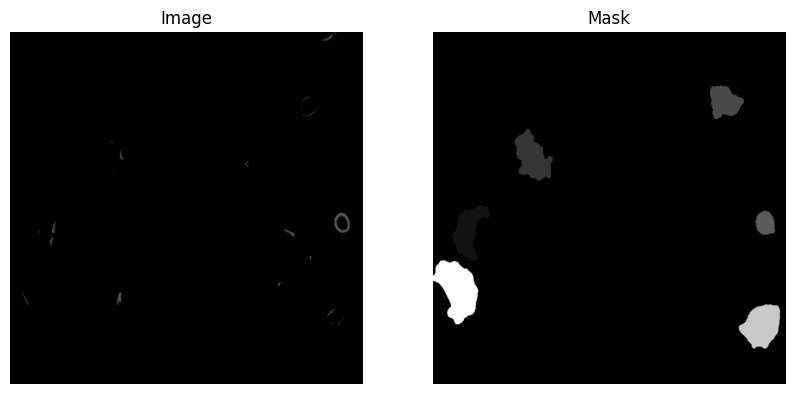

torch.Size([2, 3, 572, 572]) torch.Size([2, 1, 572, 572])


In [29]:

batch = next(iter(train_dataloader))
eg_img = batch[0][1]
eg_mask = batch[1][1]
print(eg_img.shape)
print(eg_mask.shape)
# 转换为 NumPy 并调整维度
eg_img_np = eg_img.permute(1, 2, 0).numpy()  # (572, 572, 3)
eg_mask_np = eg_mask.squeeze().numpy()
print(eg_mask_np.shape)


# 创建子图
plt.figure(figsize=(10, 5))  # 设置画布大小

plt.subplot(1, 2, 1)  # 第一个子图
plt.imshow(eg_img_np)
plt.title("Image")
plt.axis('off')

plt.subplot(1, 2, 2)  # 第二个子图
plt.imshow(eg_mask_np,cmap="gray")
plt.title("Mask")
plt.axis('off')

plt.show()

print(batch[0].shape, batch[1].shape)

## 3. 定义U-Net结构
1. 架构概述：
   - 编码器：5个卷积块，每块包含两个3x3卷积+`ReLU`，后面跟2x2最大池化。
   - 解码器：4个上采样块（转置卷积），通过跳跃连接与编码器特征拼接。
   - 输出层：1x1卷积将特征映射到分割类别数。
2. 细节：
   - 无填充卷积（padding=0）：论文中明确提到，卷积后特征图会缩小。
   - 跳跃连接：编码器特征图需裁剪以匹配上采样后的尺寸。
   - 输入572x572，输出388x388：由于无填充卷积，边缘被裁剪。

In [30]:
class UNet(nn.Module):
    def __init__(self, in_channels=3, out_channels=1):
        super(UNet, self).__init__()

        # 编码器（收缩路径）
        def conv_block(in_ch, out_ch):
            return nn.Sequential(
                nn.Conv2d(in_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_ch, out_ch, kernel_size=3, padding=1),
                nn.ReLU(inplace=True)
            )

        self.enc1 = conv_block(in_channels, 64)
        self.enc2 = conv_block(64, 128)
        self.enc3 = conv_block(128, 256)
        self.enc4 = conv_block(256, 512) 
        self.enc5 = conv_block(512, 1024)  # 瓶颈层

        self.pool = nn.MaxPool2d(2)  # 2x2池化

        # 解码器（扩展路径）
        self.up4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.dec4 = conv_block(1024, 512)  # 拼接后通道数为1024
        self.up3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.dec3 = conv_block(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.dec2 = conv_block(256, 128)
        self.up1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.dec1 = conv_block(128, 64)

        # 输出层
        self.out_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def crop_tensor(self, source, target):
        """裁剪 source 张量，使其与 target 张量的空间尺寸匹配"""
        diff_y = source.size(2) - target.size(2)
        diff_x = source.size(3) - target.size(3)
        crop_y = diff_y // 2
        crop_x = diff_x // 2
        return source[:, :, crop_y:crop_y + target.size(2), crop_x:crop_x + target.size(3)]

    def forward(self, x):
        # 编码器
        e1 = self.enc1(x)              # 572x572
        e2 = self.enc2(self.pool(e1))  # 286x286
        e3 = self.enc3(self.pool(e2))  # 143x143
        e4 = self.enc4(self.pool(e3))  # 71x71
        e5 = self.enc5(self.pool(e4))  # 35x35

        # 解码器（跳跃连接）
        d4 = self.up4(e5)              # 上采样到 70x70
        e4_cropped = self.crop_tensor(e4, d4)  # 裁剪 e4 到 70x70
        d4 = torch.cat([e4_cropped, d4], dim=1)
        d4 = self.dec4(d4)             # 70x70

        d3 = self.up3(d4)              # 上采样到 140x140
        e3_cropped = self.crop_tensor(e3, d3)  # 裁剪 e3 到 140x140
        d3 = torch.cat([e3_cropped, d3], dim=1)
        d3 = self.dec3(d3)             # 140x140

        d2 = self.up2(d3)              # 上采样到 280x280
        e2_cropped = self.crop_tensor(e2, d2)  # 裁剪 e2 到 280x280
        d2 = torch.cat([e2_cropped, d2], dim=1)
        d2 = self.dec2(d2)             # 280x280

        d1 = self.up1(d2)              # 上采样到 560x560
        e1_cropped = self.crop_tensor(e1, d1)  # 裁剪 e1 到 560x560
        d1 = torch.cat([e1_cropped, d1], dim=1)
        d1 = self.dec1(d1)             # 560x560

        out = self.out_conv(d1)        # 560x560

        # 调整输出到 572x572（可选）
        # 使用插值恢复到原始尺寸
        out = nn.functional.interpolate(out, size=(572, 572), mode='bilinear', align_corners=False)
        
        return out

### 4. 训练循环

In [4]:

device = torch.device("cuda" if torch.cuda.is_available() 
                      else "mps" if torch.mps.is_available()
                      else "cpu")
model = UNet(in_channels=3, out_channels=1).to(device)  # 二分类分割
criterion = nn.BCEWithLogitsLoss()  # 二分类损失
optimizer = optim.Adam(model.parameters(), lr=1e-4)

def train_and_evaluate(model, train_dataloader, test_dataloader, num_epochs=10):
    model.train()
    for epoch in range(num_epochs):
        # 训练阶段
        running_loss = 0.0
        for images, masks in train_dataloader:
            images, masks = images.to(device), masks.to(device)

            # 前向传播
            outputs = model(images)
            loss = criterion(outputs, masks)

            # 反向传播与优化
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        # 评估阶段（测试集）
        model.eval()
        test_loss = 0.0
        with torch.no_grad():
            for images, masks in test_dataloader:
                images, masks = images.to(device), masks.to(device)
                outputs = model(images)
                loss = criterion(outputs, masks)
                test_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {running_loss/len(train_dataloader):.4f}, Test Loss: {test_loss/len(test_dataloader):.4f}")
        model.train()  # 回到训练模式

# 开始训练和评估
train_and_evaluate(model, train_dataloader, test_dataloader, num_epochs=10)

Epoch [1/10], Train Loss: 0.1598, Test Loss: 0.0127
Epoch [2/10], Train Loss: 0.0112, Test Loss: 0.0100
Epoch [3/10], Train Loss: 0.0090, Test Loss: 0.0083
Epoch [4/10], Train Loss: 0.0081, Test Loss: 0.0081
Epoch [5/10], Train Loss: 0.0080, Test Loss: 0.0078
Epoch [6/10], Train Loss: 0.0079, Test Loss: 0.0077
Epoch [7/10], Train Loss: 0.0077, Test Loss: 0.0079
Epoch [8/10], Train Loss: 0.0076, Test Loss: 0.0076
Epoch [9/10], Train Loss: 0.0075, Test Loss: 0.0075
Epoch [10/10], Train Loss: 0.0075, Test Loss: 0.0074


### 5. 可视化训练结果

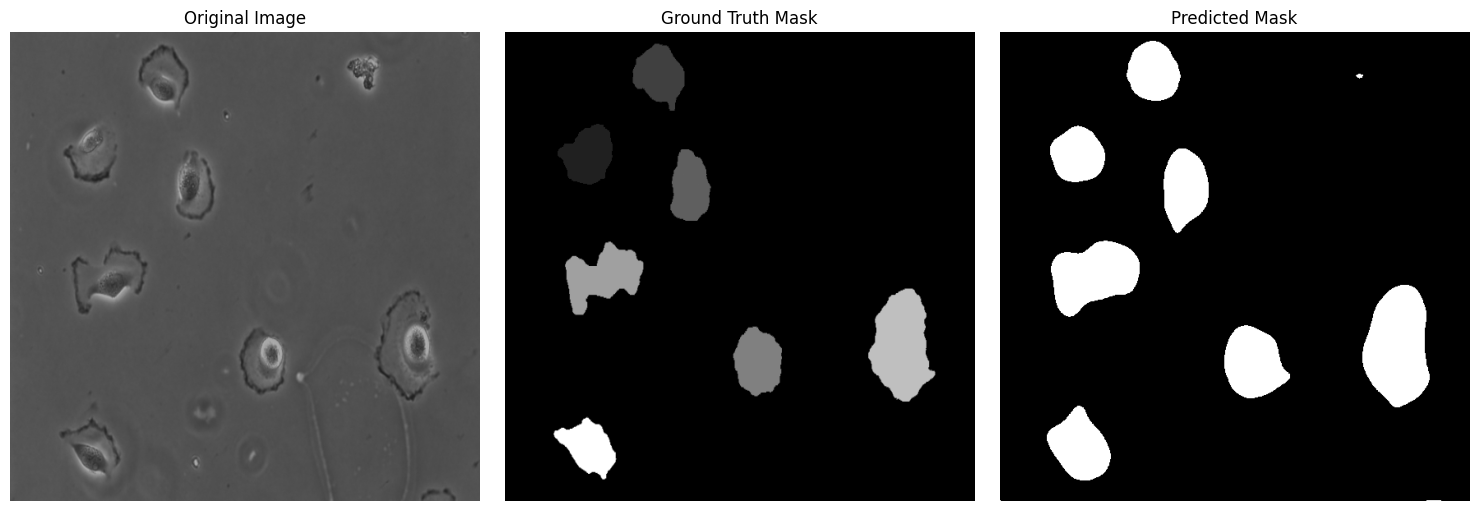

In [8]:
def visualize_prediction(model, test_dataset, device, idx=0):
    """
    可视化一个测试图像的分割结果，包括原始图像、真实掩码和预测掩码
    """
    # 获取测试集中的一个样本
    image, mask = test_dataset[idx]
    
    # 转换为批次格式并移动到设备
    image = image.unsqueeze(0).to(device)  # 添加批次维度 [1, 3, 572, 572]
    
    # 模型推理
    model.eval()
    with torch.no_grad():
        output = model(image)
        pred_mask = torch.sigmoid(output).float()>2e-3  # 转换为二值掩码（阈值0.5）
    
    # 反归一化图像（恢复原始像素值）
    # 保持 image 为 PyTorch 张量，执行反归一化
    image = image.squeeze().cpu()  # 移除批次维度，形状 [3, 572, 572]
    # 反归一化：从 [-1, 1] 恢复到 [0, 1]
    mean = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)  # 形状 [3, 1, 1]
    std = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)   # 形状 [3, 1, 1]
    image = image * std + mean  # 反归一化
    image = image.numpy()       # 转换为 NumPy 数组
    image = np.transpose(image, (1, 2, 0))  # 转换为 HWC 格式 [572, 572, 3]
    
    # 提取掩码（确保是 [388, 388]）
    mask = mask.squeeze().cpu().numpy()
    pred_mask = pred_mask.squeeze().cpu().numpy()
    
    # 创建可视化
    plt.figure(figsize=(15, 5))
    
    # 绘制原始图像（572x572）
    plt.subplot(131)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')
    
    # 绘制真实掩码
    plt.subplot(132)
    plt.imshow(mask, cmap='gray')
    plt.title("Ground Truth Mask")
    plt.axis('off')
    
    # 绘制预测掩码
    plt.subplot(133)
    plt.imshow(pred_mask, cmap='gray')
    plt.title("Predicted Mask")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

# 在训练后可视化一个测试图像的分割结果
# 选择测试集中的第一个样本（idx=0），您可以更改idx以查看其他样本
visualize_prediction(model, test_dataset, device, idx=1)

## Nice！